### 1.2 Descripción del problema de regresión.

Este dataset contiene variables independientes que corresponden a las características físicas y químicas de un conjunto de vinos, la variable dependiente es "Quality" (calidad) que determina la calidad de los vinos en un rango de 3 a 9 (por ejemplo una calidad de 9 es mayor a una calidad de 8).

### 2.2 Análisis exploratorio de datos (EDA) del problema de regresión.

In [1]:
%pip install ucimlrepo # Esta librería contiene el dataset de regresión.

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from ucimlrepo import fetch_ucirepo
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [3]:
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 

df_reg = pd.concat([X, y], axis=1)
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [4]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [5]:
round(df_reg.describe(),2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00
75%,7.70,0.40,0.39,8.10,0.06,41.00,156.00,1.00,3.32,0.60,11.30,6.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00


Text(0.5, 1.0, 'Matriz de Correlación del Dataset de Regresión')

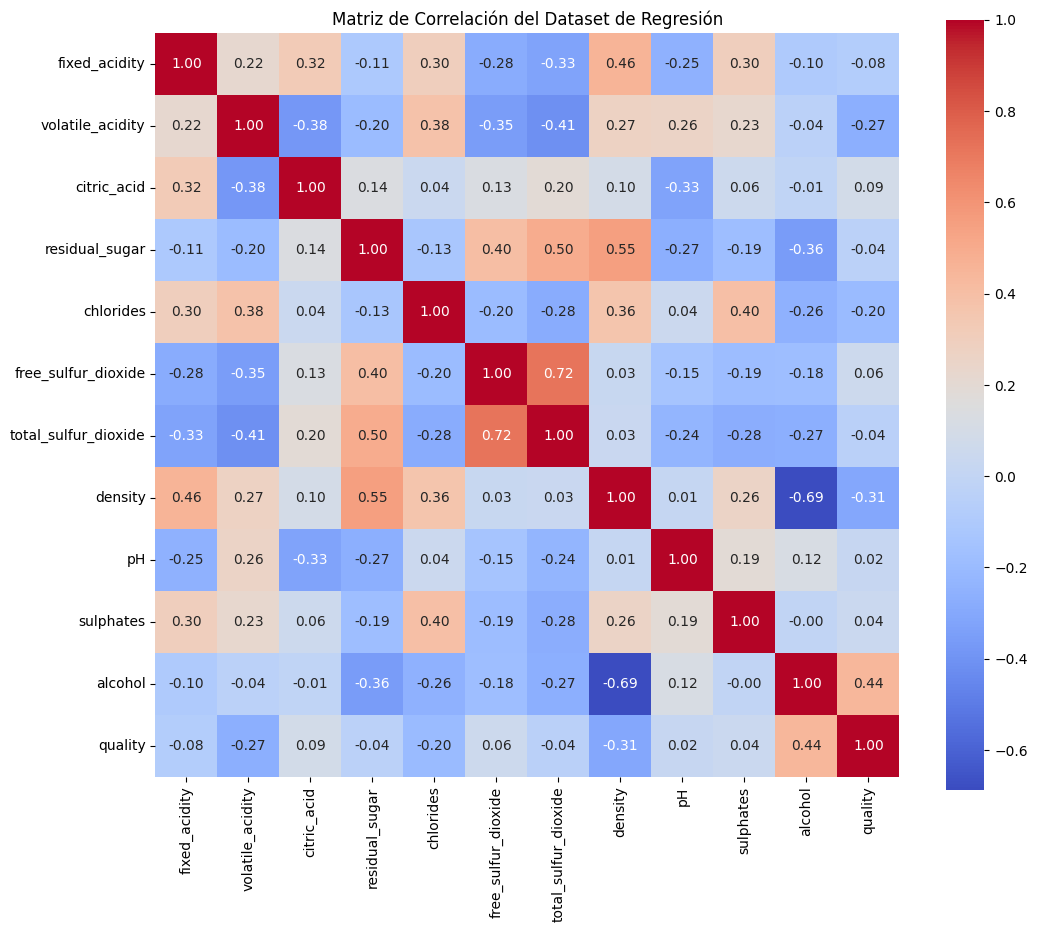

In [6]:
matriz_de_correlacion_reg = df_reg.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_de_correlacion_reg, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación del Dataset de Regresión')

No hay muchos coeficientes de correlación altos en la matriz de correlación, podemos usar SelectKBest con mutual_info_regression para ver qué pasa con un método de selección de características que considera relaciones no lineales.

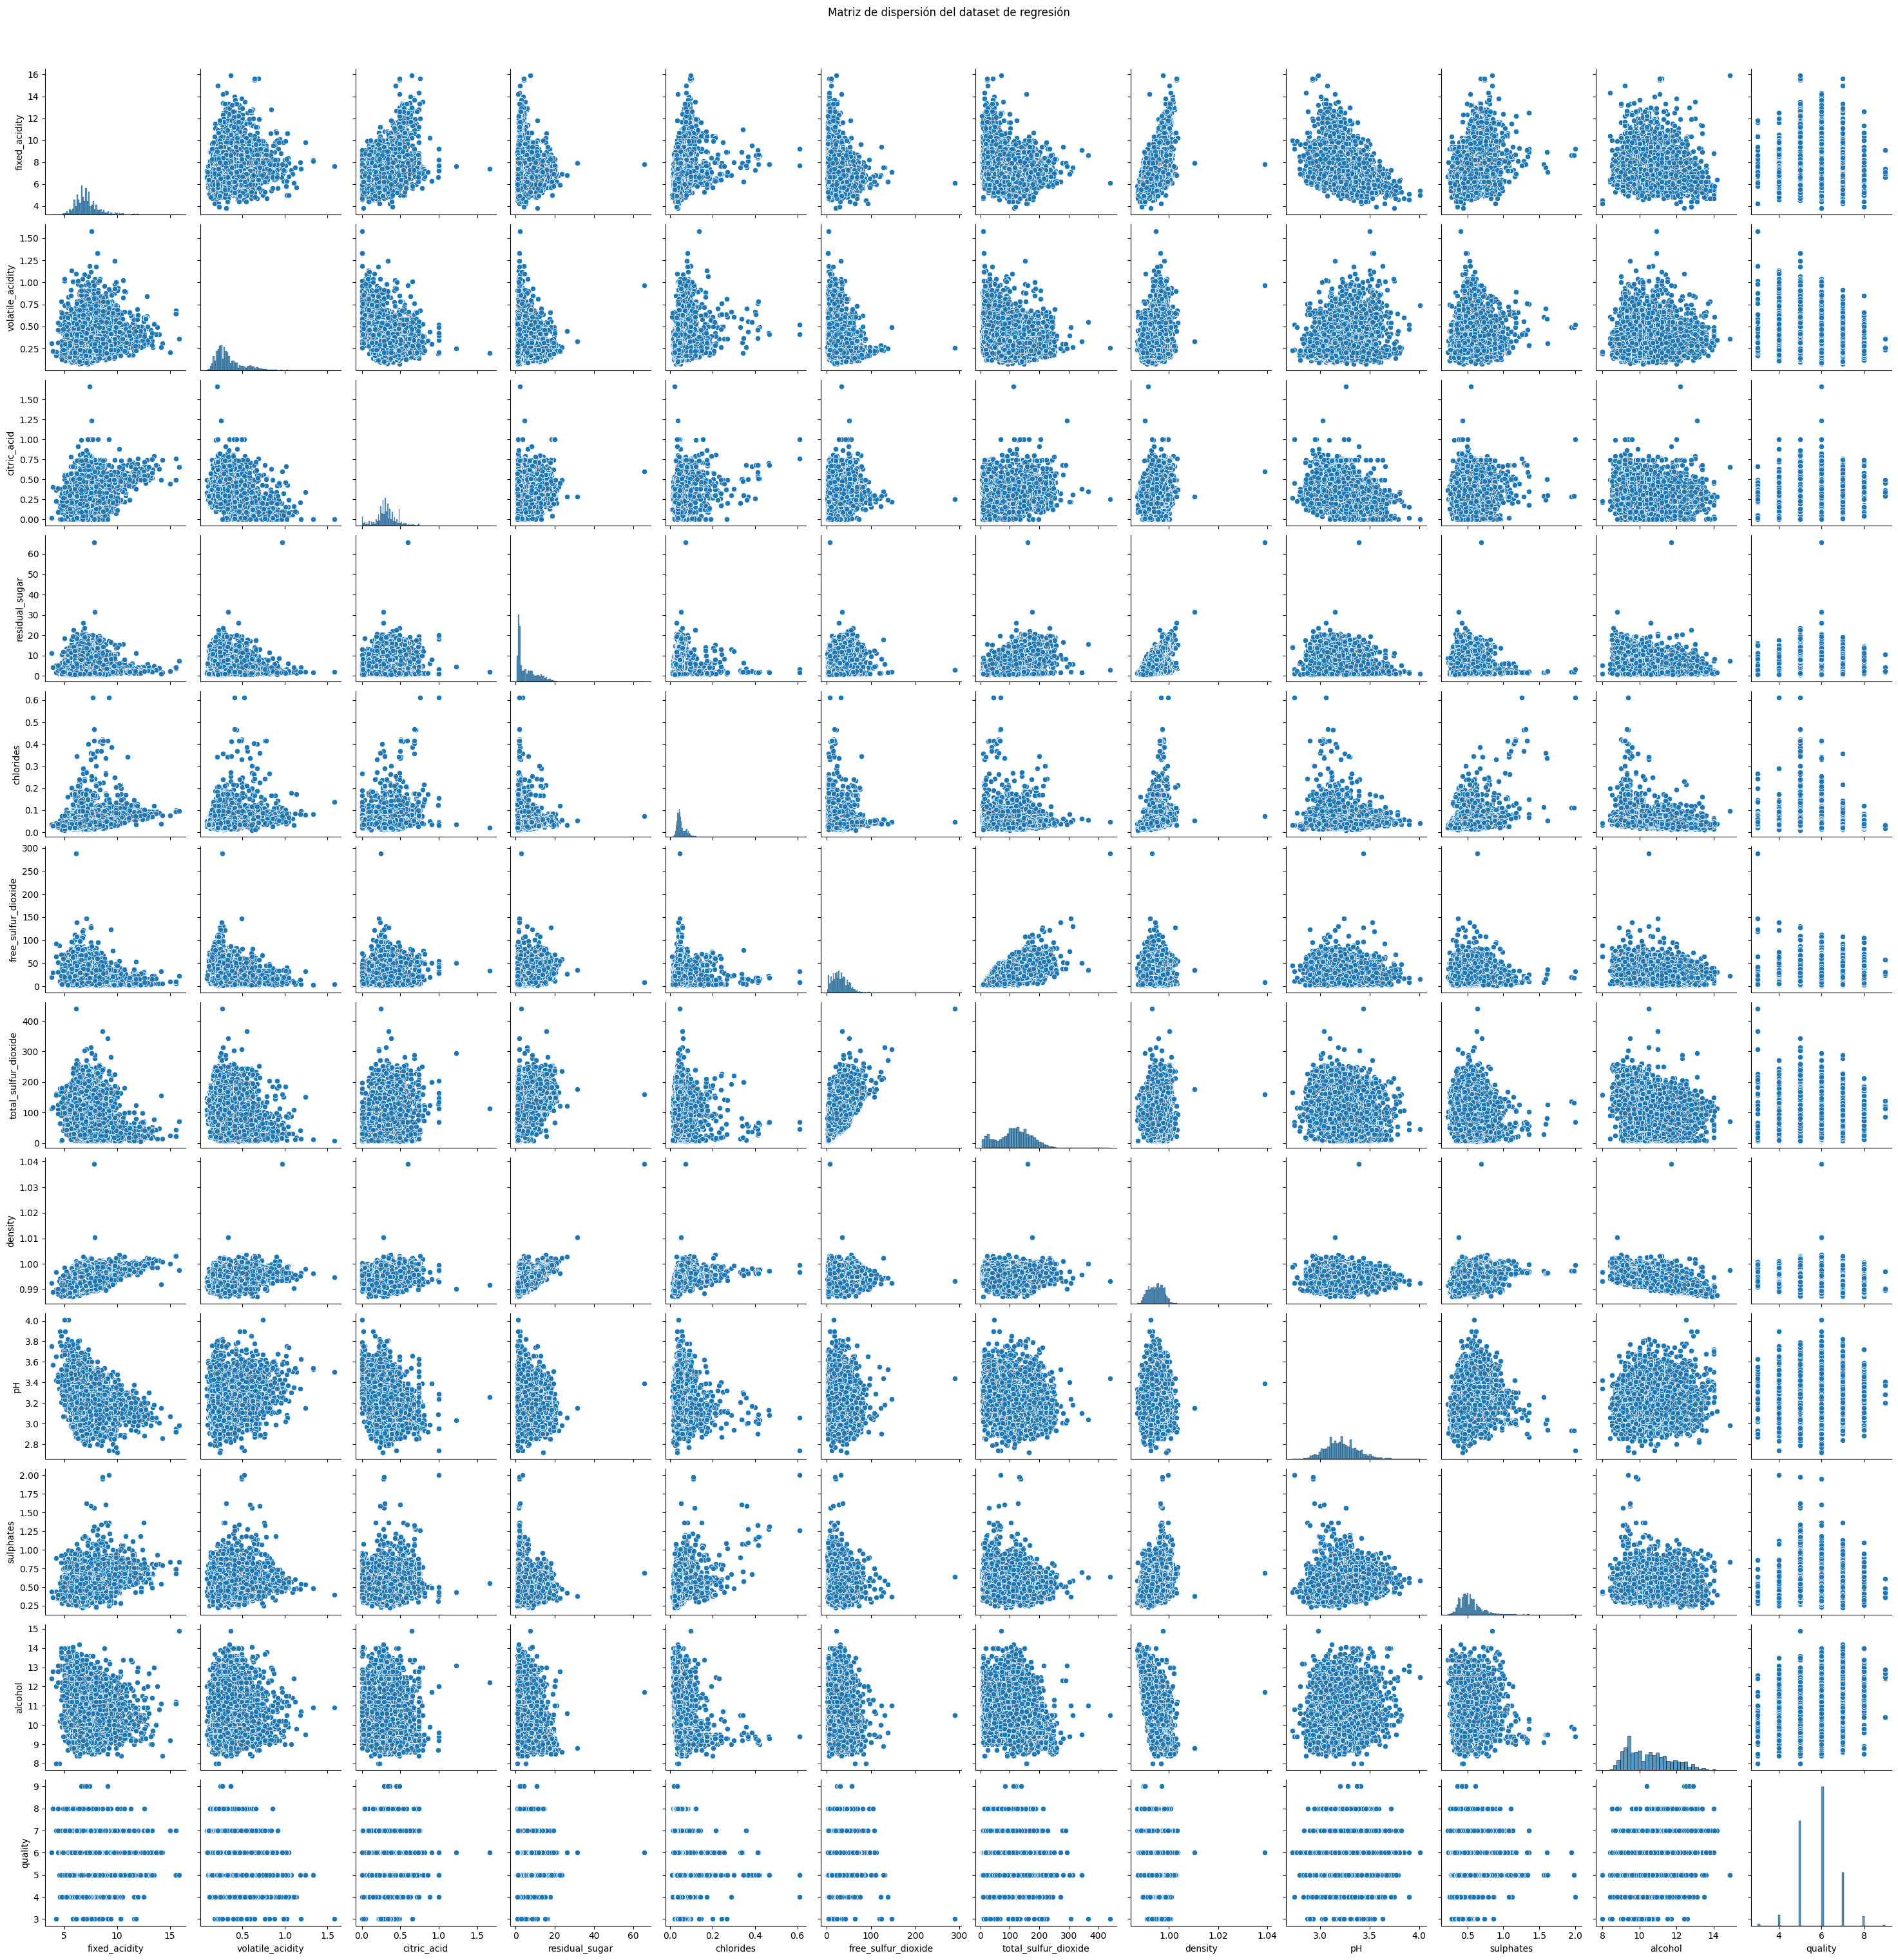

In [7]:
sns.pairplot(df_reg)
plt.suptitle("Matriz de dispersión del dataset de regresión", y=1.02)
plt.show()

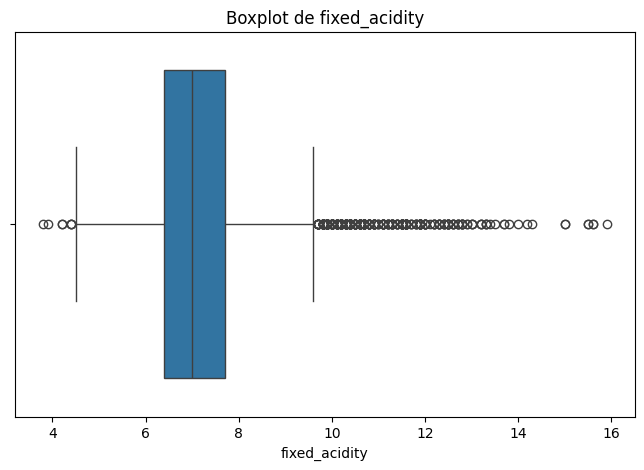

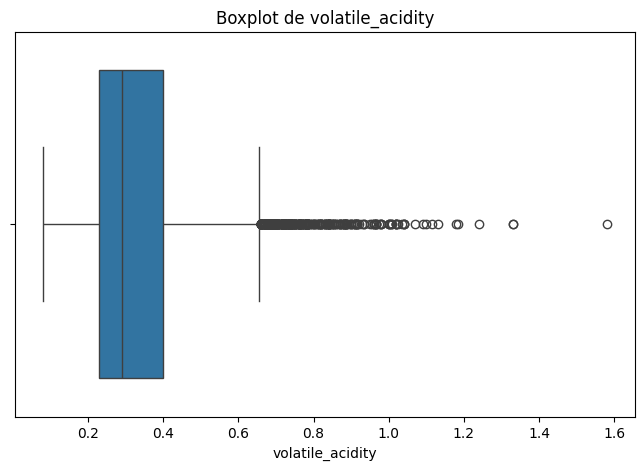

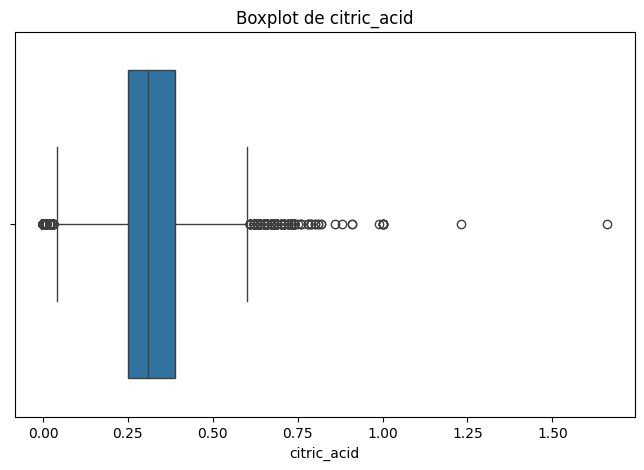

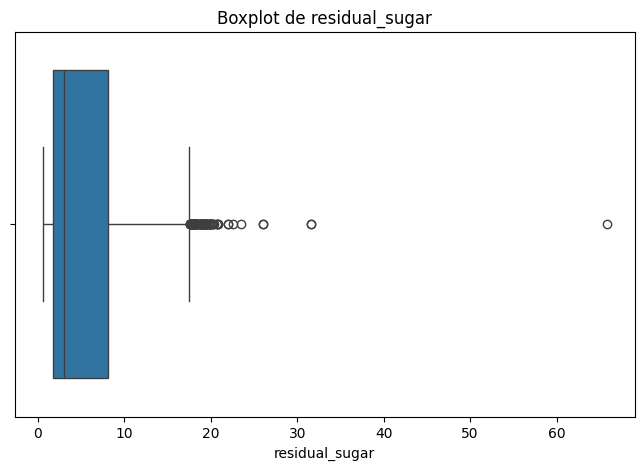

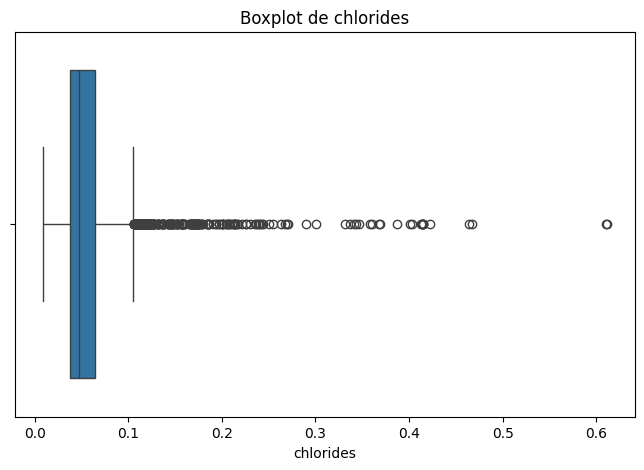

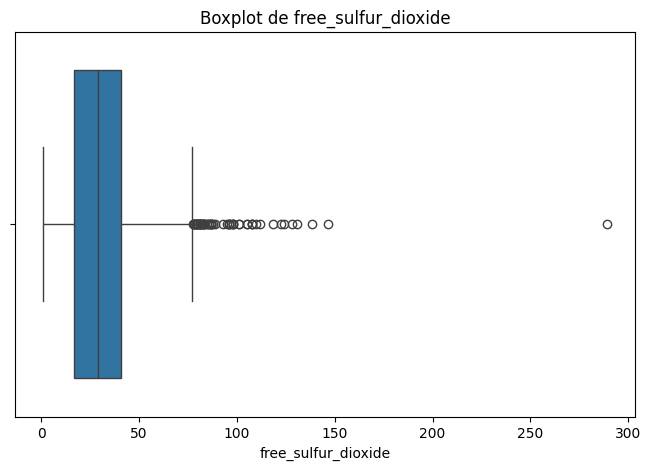

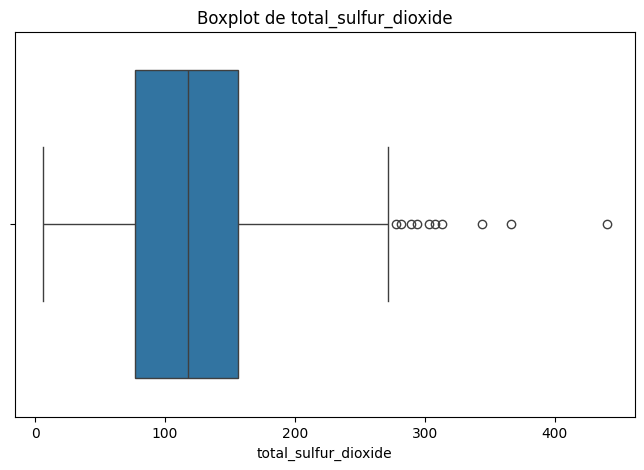

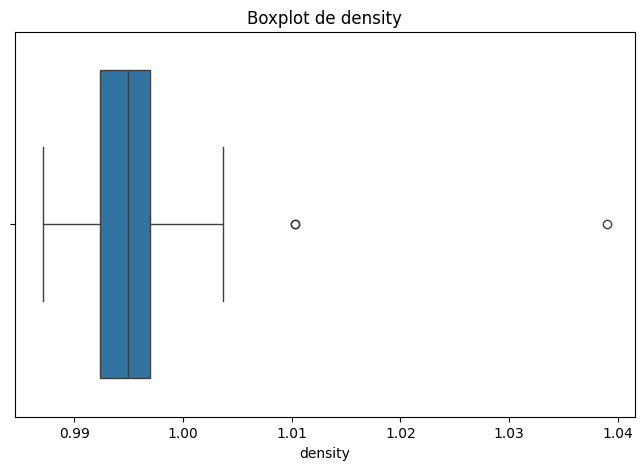

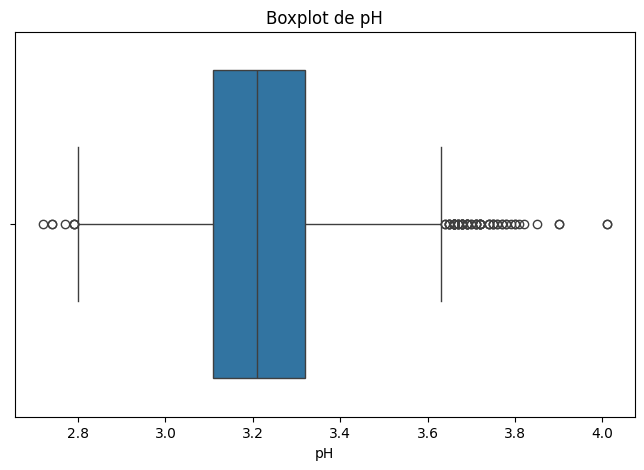

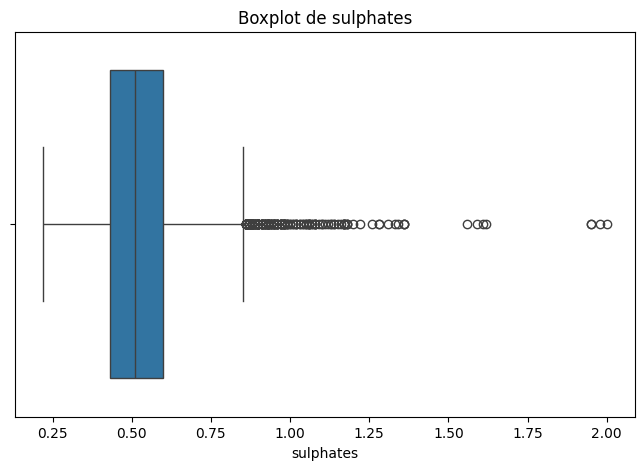

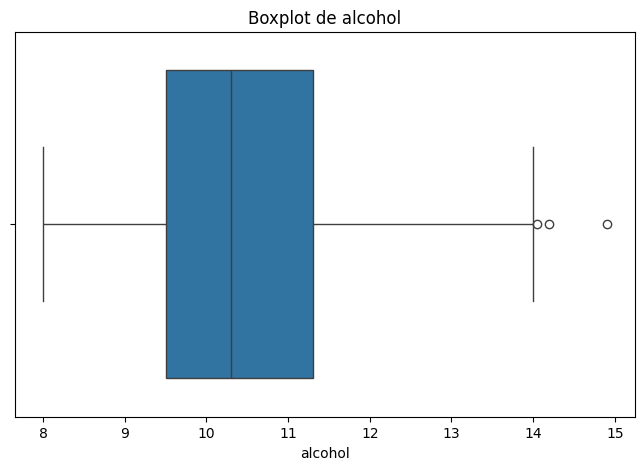

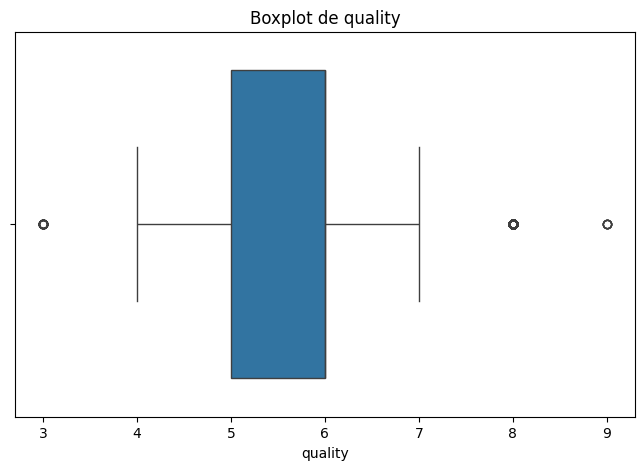

In [8]:
def boxplot_reg(df, column):
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)
    plt.show()  

for column in df_reg.columns:
    boxplot_reg(df_reg, column)

In [9]:
df_reg['quality'].nunique() 

7

In [10]:
round(df_reg.groupby('quality').size()/len(df_reg)*100,2)

quality
3     0.46
4     3.32
5    32.91
6    43.65
7    16.61
8     2.97
9     0.08
dtype: float64

Vemos que hay un desbalance de clases.

### 3.2 Preprocesamiento de datos para el problema de regresión.

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)
print(X_test)
print(y_train)
print(y_test)